# Trabalho de Cálculo Numérico
### Grupo: Luís Felipe, Pedro Fellipe, Thiago Cosme


## Questão 1:

In [65]:
import numpy as np
# Dados do enunciado
x0 = 0.0
xn = 3.0
n = 12
h = (xn-x0)/n
f = lambda x: np.exp(x) * (x**2)

# Criando n+1 pontos igualmente espacados 
X = np.linspace(x0, xn, n+1)


# Regra dos trapézios usando funções do numpy
It = (h/2)*(f(X[0]) + 2*np.sum(f(X[1:n:1])) + f(X[-1]))
print ("Resultado Trapézio: ", It)

# Regra 3/8 de Simpson usando funções do numpy
I = (3*h/8)*(f(X[0]) + 3*np.sum(f(X[1:n:3])+f(X[2:n:3])) + 2*np.sum(f(X[3:n:3]))+ f(X[-1]))

print ("Resultado 3/8 de Simpson: ", I)

# Regra 1/3 de Simpson usando funções do numpy
Ifa = (h/3)*(f(X[0]) + 4*np.sum(f(X[1:n:2])) + 2*np.sum(f(X[2:n:2]))+ f(X[-1]))
print ("Resultado 1/3 de Simpson: ", Ifa)

anal = lambda x: x**2*np.exp(x) - 2*(x*np.exp(x)-np.exp(x))
res_anal= anal(3)-anal(0)
print ("o resultado analitico foi:", res_anal)


Resultado Trapézio:  99.99331307969648
Resultado 3/8 de Simpson:  98.458927988704
Resultado 1/3 de Simpson:  98.44175237978553
o resultado analitico foi: 98.42768461593835


O método que com 12 passos converge para o valor mais próximo da solução analítica é o da regra de um terço de Simpson. Com erro de aproximadamente 0.02


## Questão 2:

Como na questão foi dada a fórmula da velocidade, para obtermos a posição foi preciso integrar. Optamos pelo método de um terço de Simpson, pois como vimos na questão acima, foi o que convergiu mais rapidamente. 
Para calcular o erro, utilizamos uma variável auxiliar para guardar o valor calculado na integração anterior e rodamos o programa num loop para valores incrementados de 'n', até que o erro absoluto cometido fosse menor que 0.0001

In [182]:
import math
import numpy as np
x0 = 0.0
xn = 10.0


n = 16
Iant = 1000
erro = 100



while erro > 0.0001:

    h = (xn-x0)/n

    m = 68.1
    g = 9.81
    c = 0.25

    f = lambda t: np.sqrt((g*m)/c)*np.tanh(np.sqrt(((g*c*t)/m)))
    X = np.linspace(x0, xn, n+1)
    
    # Regra 1/3 de Simpson usando funcoes do numpy
    I = (h/3)*(f(X[0]) + 4*np.sum(f(X[1:n:2])) + 2*np.sum(f(X[2:n:2]))+ f(X[-1]))
    
    
    erro = abs(I - Iant)
    Iant = I
    n = n + 2   

print ("Segundo o método 1/3 de Simpson com precisão de 3 casas decimais, o objeto cai: ", I, "m")

Segundo o método 1/3 de Simpson com precisão de 3 casas decimais, o objeto cai:  193.2869696918925 m


## Questão 3:
Para saber a massa da barra a partir da tabela dada, criamos um vetor y, para armazenar o produto entre a densidade e a área da seção transversal para cada valor de x, em seguida integramos.

In [12]:
import numpy as np

x0 = 0
xn = 12
n = 6
h = (xn-x0)/n

X = np.linspace(x0, xn, n+1)
Y = np.zeros(7)

ro = np.array( [4.00, 3.95, 3.80, 3.60, 3.41, 3.30, 3.20] )
Ac = np.array( [100., 103., 110., 120., 133., 150., 171.] )

for i in range (7):
    Y[i] = ro[i]*Ac[i]



Integral = (h/3.0)*(Y[0] + 4.0*np.sum(Y[1:n:2]) + 2.0*np.sum(Y[2:n:2])+ Y[-1])


massa = Integral/1000
print ("A massa da Haste em [kg] é:", massa)


A massa da Haste em [kg] é: 5.350439999999999


## Questão 4 a e b: 


------------------------------------------------------------
Com  0.25 de passo:
Limitante superior para o erro:  0.1616875


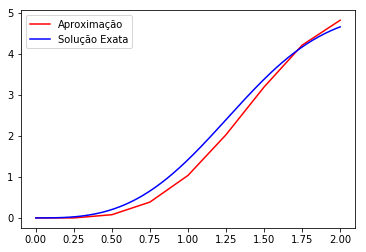


------------------------------------------------------------
Com  0.1 de passo:
Limitante superior para o erro:  0.025870000000000004


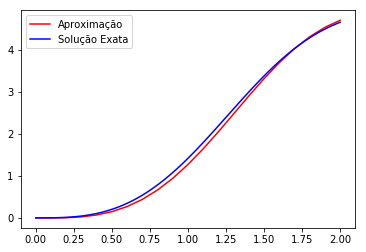


------------------------------------------------------------
Com  0.05 de passo:
Limitante superior para o erro:  0.006467500000000001


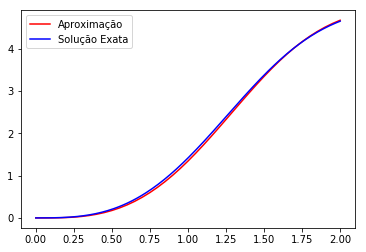

In [13]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

H = [ 0.25, 0.10, 0.05] # vetor dos passos

for i in range(3):
    
    h = H[i]
    x0 = 0.0
    xn = 2.0

    
    X = np.arange(x0, xn+h, h) 
    Y = [0.]
    Xex = np.linspace(0,2,200)
    Yex = []


    f = lambda x,y: x**2*(5-y)
    sol_ex = lambda x: 5 - 5*np.exp((-x**3.)/3.)
    
    
    for n in range(len(X)-1):
        Y.append(Y[n] + f(X[n],Y[n])*h ) #Y[-1] é o último yi calculado
        Indice.append(n)
        
    for x in Xex:         # Vetor da solução exata
        Yex.append(sol_ex(x))
        
    
    M = 5.174           # Derivada de maior módulo entre 0 e 2
    erro = M*h*h/(math.factorial(2))
    
    
    
    print("\n------------------------------------------------------------")
    print ("Com ",h,"de passo:")
    print("Limitante superior para o erro: ",erro)

    
    s = lambda x: np.exp(-x) + x + 1
    Xe = np.linspace(x0,xn, 20)
    Ye = s(Xe)
    
    
    plt.plot(X, Y, "r-", Xex, Yex, "b-")
    plt.legend(('Aproximação', 'Solução Exata'))
    plt.show()
    

## Questão 4 c:

Como sabe-se a solução exata da equação, podemos deriva-la 2 vezes para o cálculo da estimativa superior do erro.
$$\cfrac{d^2u}{dt^2} = 5te^{\frac{-t^3}{3}}~~\left(2 -t^3\right)$$

Abaixo plotamos o gráfico dessa função. Utilizando uma ferramenta gráfica mais avançada vimos que o ponto de maior derivada em módulo é o (0,718 ; 5,174). Assim usamos o o valor de 5.174 para 'M' na fómula do limitante superior para o erro. 

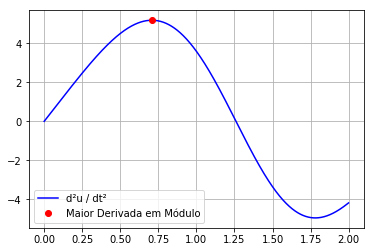

In [3]:
Xex = np.arange(0, 2, 0.001)
Yex = []
max_der = lambda x: 5.*x*np.exp((-x**3.)/3.)*(2.-x**3.)

for x in Xex:
    Yex.append(max_der(x))
    
M = 0.708

plt.plot(Xex, Yex, "b-",M, max_der(M), "ro")
plt.legend(('d²u / dt²','Maior Derivada em Módulo'))
plt.grid()
plt.show()


## Questão 5:
O problema pede que seja calculado e plotado o gráfico do fluxo de calor, ou seja, a condução. No problema são dadas as condições para eliminar a derivada do lado direito da igualdade, facilitando assim o cálculo, dando também as condições iniciais para Q(0) = 0. Usamos o método de Euler para aproximar a solução da EDO.

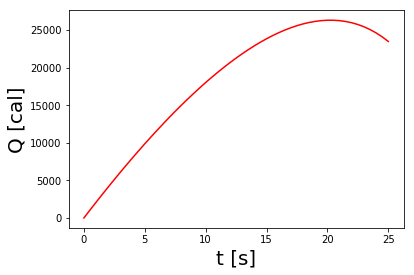

In [15]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

h = 0.5 #passo
t0 = 0.0 #valor inicial[s]
tn = 25.0 #valor final[s]
λ = 0.5 #Constante[cal*cm/s]
A = 12.0 #Área da seção transversal[cm²]
L = 20.0 #Comprimento do Cilindro[cm]
x = 2.5 #Distância da Extremidade aquecida[cm]


# criamos a lista com os pontos xi
M = np.arange(t0, tn+h, h) 


# lista com y0, a ser preenchida pelos yi
Y = [0]                  

# entramos com f(t)
f = lambda t: λ*A*((100*(L-x)*(20-t))/(100-x*t))

# laço para ir calculando os yi e preenchendo a lista
for m in M[0:-1]:
    Y.append(Y[-1] + f(m)*h ) #Y[-1] é o último yi calculado
    

# plota
plt.xlabel('t [s]',fontsize=20)
plt.ylabel('Q [cal]',fontsize=20)
plt.plot(M, Y, 'r-')
plt.show()
